# NESTpy benchmark plot updates
S.J. Andaloro, 30/08/2019


Link to github repository: https://github.com/NESTCollaboration/nestpy/blob/master/

In [1]:
import nestpy 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes

In [2]:
#Detector identification
detector = nestpy.DetectorExample_XENON10()
# detector = nestpy.VDetector()

# Performing NEST calculations according to the given detector example       
nc = nestpy.NESTcalc(detector) #can also be left empty    

In [3]:
#GetInteractionObject grabs the number for the interaction you want 
#so you don't have to always reference the dictionary. Just type e.g., 'ion'
#It just changes the name to a number for nestpy to do its work.
def GetInteractionObject(name):
    name = name.lower()
    
    if name == 'er':
        raise ValueError("For 'er', specify either 'gammaray' or 'beta'")
    
    nest_interaction_number = dict(
        nr=0,
        wimp=1,
        b8=2,
        dd=3,
        ambe=4,
        cf=5,
        ion=6,
        gammaray=7,
        beta=8,
        ch3t=9,
        c14=10,
        kr83m=11,
        nonetype=12,
    )
    
    interaction_object = nestpy.INTERACTION_TYPE(nest_interaction_number[name])
    return interaction_object

#Once you have interaction, you can get yields
#Begin with np.vectorize so that we can get yields over a range of interaction types/energies/drift fields.
@np.vectorize
def GetYieldsVectorized(interaction, yield_type, **kwargs):
    # This function does nc.GetYields for the various interactions and arguments we pass into it
    # TODO: Look at docstrings
    
    interaction_object = GetInteractionObject(interaction)
    
    if 'energy' in kwargs.keys():
        if interaction_object == GetInteractionObject('nr') and kwargs['energy'] > 3e2:
            return np.nan
    if interaction_object == GetInteractionObject('gammaray') and kwargs['energy'] > 3e3:
            return np.nan
    if interaction_object == GetInteractionObject('beta') and kwargs['energy'] > 3e3:
            return np.nan     
    yield_object = nc.GetYields(interaction = interaction_object, **kwargs)
    #this returns the yields for the type of yield we are considering be it ElectronYield or PhotonYield (an attribute of yield)
    return getattr(yield_object, yield_type)

#Gives us photon yield values
def PhotonYield(**kwargs):
    return GetYieldsVectorized(yield_type = 'PhotonYield', **kwargs)
#Gives electron yields    
def ElectronYield(**kwargs):
    return GetYieldsVectorized(yield_type = 'ElectronYield', **kwargs)

def Yield(**kwargs):
    return {'photon' : PhotonYield(**kwargs),
            'electron' : ElectronYield(**kwargs),
           # What is missing?  Aren't there other parts of YieldObject?
           }

In [4]:
#we are able to do nestpy with 13 different interaction types and that's all we're going to use here.
# interaction_types = np.array(['nr','wimp','b8','dd','ambe','cf','ion', 'gammaray', 'beta', 'ch3t', 'c14', 'kr83m', 'nonetype'])

fields = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000] 

energies = np.logspace(-1, 4, 2000)
energies = np.broadcast_to(energies, (len(fields), len(energies))) 

## Nuclear Recoils
The following are the energy and field ranges for nuclear recoil examples in the detector and interaction we set above. 

In [5]:
nr_electrons = ElectronYield(interaction='nr', energy=energies.T, drift_field = fields).T/energies
nr_photons = PhotonYield(interaction='nr', energy=energies.T, drift_field = fields).T/energies

In [6]:
def nr_subplot(x, y_photons, y_electrons, driftFields):
    plt.figure(figsize=(13.2,4.1))
    subplot1 = plt.subplot(121)
    subplot2 = plt.subplot(122)
    for i in range(0, len(driftFields)-2):
        subplot1.plot(x[i,:], y_photons[i,:], label="{0} V/cm".format(driftFields[i]))
        subplot2.plot(x[i,:], y_electrons[i,:], label="{0} V/cm".format(driftFields[i]))   
        
    subplot1.set_xscale('log')
    subplot2.set_xscale('log')
    
    subplot1.set_ylim(bottom=0)
    subplot2.set_ylim(bottom=0)
    
    subplot1.legend(loc='best', fontsize= 8, ncol=3)
    subplot1.set_xlabel('Recoil Energy [keV]')
    subplot1.set_ylabel('Light Yields [n$_\gamma$/keV]')
    subplot1.set_title('Light Yields for Nuclear Recoils')
    subplot1.margins(0)         
    subplot2.legend(loc='best', fontsize= 8, ncol=3)    
    subplot2.set_xlabel('Recoil Energy [keV]')
    subplot2.set_title('Charge Yields for Nuclear Recoils')
    subplot2.set_ylabel('Charge Yield [n$_e$/keV]') 
    subplot2.margins(0)

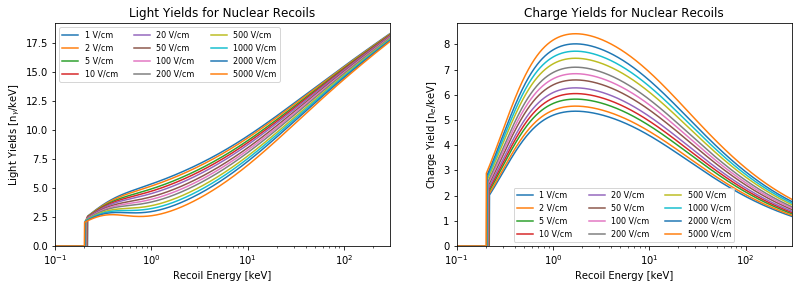

In [7]:
nr_subplot(energies, nr_photons, nr_electrons, fields)

## $\beta$ electron recoils
The following are the energy and field ranges for $\beta$ electron recoil examples in the detector and interaction we set above. 

In [8]:
beta_electrons = ElectronYield(interaction='beta', energy=energies.T, drift_field = fields).T/energies
beta_photons = PhotonYield(interaction='beta', energy=energies.T, drift_field = fields).T/energies

/Users/Sophia/anaconda3/envs/py37rice/lib/python3.7/site-packages/numpy/lib/function_base.py:2167: RuntimeWarning: overflow encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [9]:
def beta_subplot(x, y_photons, y_electrons, driftFields):
    plt.figure(figsize=(13.2,4.1))
    subplot1 = plt.subplot(121)
    subplot2 = plt.subplot(122)
    for i in range(0, len(driftFields)):
        subplot1.plot(x[i,:], y_photons[i,:], label="{0} V/cm".format(driftFields[i]))
        subplot2.plot(x[i,:], y_electrons[i,:], label="{0} V/cm".format(driftFields[i]))   
        
    subplot1.set_xscale('log')
    subplot2.set_xscale('log')
    
    subplot1.set_ylim(bottom=0)
    subplot2.set_ylim(bottom=0)
    
    subplot1.legend(loc='best', fontsize= 7, ncol=1)
    subplot1.set_xlabel('Energy [keV]')
    subplot1.set_ylabel('Light Yields [n$_\gamma$/keV]')
    subplot1.set_title('Light Yields for $\\beta$ Electron Recoils')
    subplot1.margins(0)         
    subplot2.legend(loc='best', fontsize= 7, ncol=1)    
    subplot2.set_xlabel('Energy [keV]')
    subplot2.set_title('Charge Yields for $\\beta$ Electron Recoils')
    subplot2.set_ylabel('Charge Yield [n$_e$/keV]') 
    subplot2.margins(0)

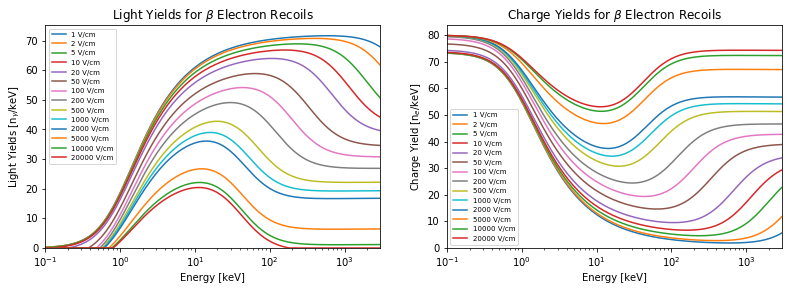

In [10]:
beta_subplot(energies, beta_photons, beta_electrons, fields)

## $\gamma$ electron recoils
The following are the energy and field ranges for $\gamma$ electron recoil examples in the detector and interaction we set above. 

In [11]:
gamma_electrons = ElectronYield(interaction='gammaray', energy=energies.T, drift_field = fields).T/energies
gamma_photons = PhotonYield(interaction='gammaray', energy=energies.T, drift_field = fields).T/energies

In [12]:
def gamma_subplot(x, y_photons, y_electrons, driftFields):
    plt.figure(figsize=(13.2,4.1))
    subplot1 = plt.subplot(121)
    subplot2 = plt.subplot(122)
    for i in range(0, len(driftFields)):
        subplot1.plot(x[i,:], y_photons[i,:], label="{0} V/cm".format(driftFields[i]))
        subplot2.plot(x[i,:], y_electrons[i,:], label="{0} V/cm".format(driftFields[i]))   
        
    subplot1.set_xscale('log')
    subplot2.set_xscale('log')
    
    subplot1.set_ylim(bottom=0)
    subplot2.set_ylim(bottom=0)
    
    subplot1.legend(loc='best', fontsize= 7, ncol=1)
    subplot1.set_xlabel('Energy [keV]')
    subplot1.set_ylabel('Light Yields [n$_\gamma$/keV]')
    subplot1.set_title('Light Yields for $\\gamma$ Electron Recoils')
    subplot1.margins(0)         
    subplot2.legend(loc='best', fontsize= 7, ncol=1)    
    subplot2.set_xlabel('Energy [keV]')
    subplot2.set_title('Charge Yields for $\\gamma$ Electron Recoils')
    subplot2.set_ylabel('Charge Yield [n$_e$/keV]') 
    subplot2.margins(0)

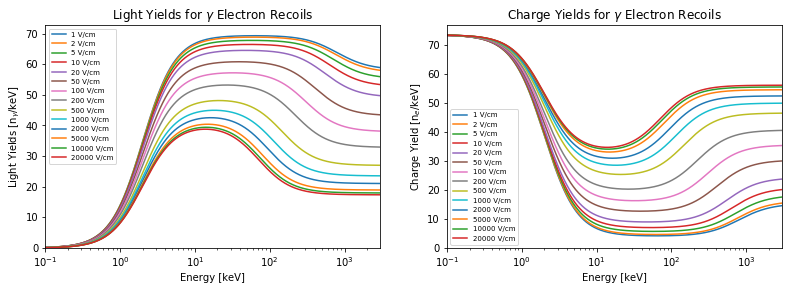

In [13]:
gamma_subplot(energies, gamma_photons, gamma_electrons, fields)

## $\alpha$-particle recoils
The following are the energy and field ranges for alpha particle recoil examples in the detector and interaction we set above. 

In [14]:
alpha_electrons = ElectronYield(interaction='ion', Z=2, A = 4, energy=energies.T, drift_field = fields).T/energies
alpha_photons = PhotonYield(interaction='ion',Z=2, A=4, energy=energies.T, drift_field = fields).T/energies

In [15]:
def alpha_subplot(x, y_photons, y_electrons, driftFields):
    plt.figure(figsize=(13.2,4.1))
    subplot1 = plt.subplot(121)
    subplot2 = plt.subplot(122)
    for i in range(0, len(driftFields)):
        subplot1.plot(x[i,:], y_photons[i,:], label="{0} V/cm".format(driftFields[i]))
        subplot2.plot(x[i,:], y_electrons[i,:], label="{0} V/cm".format(driftFields[i]))   
        
    subplot1.set_xscale('log')
    subplot2.set_xscale('log')
    
    subplot1.set_ylim(bottom=0)
    subplot1.set_xlim(1, 1e4)
    subplot2.set_ylim(bottom=0)
    subplot2.set_xlim(1, 1e4)
    
    subplot1.legend(loc='best', fontsize= 7, ncol=2)
    subplot1.set_xlabel('Energy [keV]')
    subplot1.set_ylabel('Light Yields [n$_\gamma$/keV]')
    subplot1.set_title('Light Yields for $\\alpha$-Particle Nuclear Recoils')
    subplot1.margins(0)         
    subplot2.legend(loc='best', fontsize= 7, ncol=2)    
    subplot2.set_xlabel('Energy [keV]')
    subplot2.set_title('Charge Yields for $\\alpha$-Particle Nuclear Recoils')
    subplot2.set_ylabel('Charge Yield [n$_e$/keV]') 
    subplot2.margins(0)

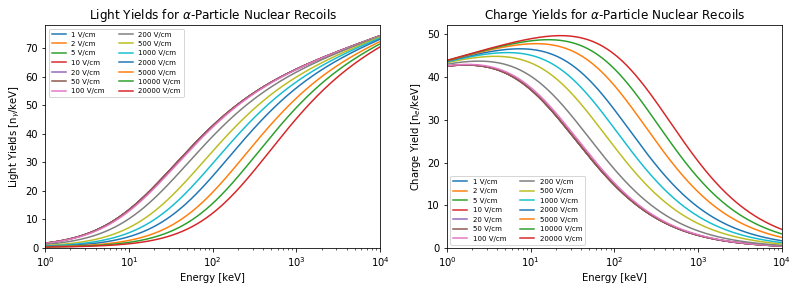

In [16]:
alpha_subplot(energies, alpha_photons, alpha_electrons, fields)

## $^{206}$Pb nuclear recoils
The following are the energy and field ranges for Pb-206 particle recoil examples in the detector and interaction we set above. 

In [17]:
Pb_electrons = ElectronYield(interaction='ion', Z=82, A = 206, energy=energies.T, drift_field = fields).T/energies
Pb_photons = PhotonYield(interaction='ion',Z=82, A=206, energy=energies.T, drift_field = fields).T/energies

In [18]:
def Pb_subplot(x, y_photons, y_electrons, driftFields):
    plt.figure(figsize=(13.2,4.1))
    subplot1 = plt.subplot(121)
    subplot2 = plt.subplot(122)
    for i in range(0, len(driftFields)):
        subplot1.plot(x[i,:], y_photons[i,:], label="{0} V/cm".format(driftFields[i]))
        subplot2.plot(x[i,:], y_electrons[i,:], label="{0} V/cm".format(driftFields[i]))   
        
    subplot1.set_xscale('log')
    subplot2.set_xscale('log')
    
    subplot1.set_ylim(0, 10)
    subplot1.set_xlim(1, 1e2)
    subplot2.set_ylim(bottom=0)
    subplot2.set_xlim(1, 1e2)
    
    subplot1.legend(loc='best', fontsize= 8, ncol=3)
    subplot1.set_xlabel('Energy [keV]')
    subplot1.set_ylabel('Light Yields [n$_\gamma$/keV]')
    subplot1.set_title('Light Yields for Nuclear Recoils from $^{206}$Pb')      
    subplot2.legend(loc='best', fontsize= 7, ncol=3)    
    subplot2.set_xlabel('Energy [keV]')
    subplot2.set_title('Charge Yields for Nuclear Recoils from $^{206}$Pb')
    subplot2.set_ylabel('Charge Yield [n$_e$/keV]') 

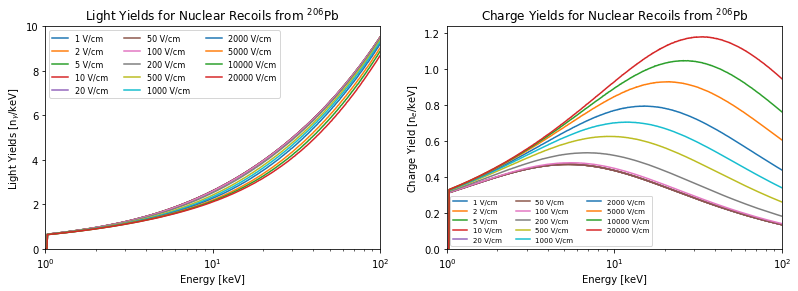

In [19]:
Pb_subplot(energies, Pb_photons, Pb_electrons, fields)